In [1]:
from src.data_loader import load_file, select_to_load_data
from src.strategy import STRATEGY_REGISTRY
from src.backtester import Backtester
from src.metrics import calculate_metrics
from src.tracker import save_experiment
from src.visualizer import show_metrics, plot_results

Data loaded from data/RELIANCE.NS 2025-08-20 16:33:52


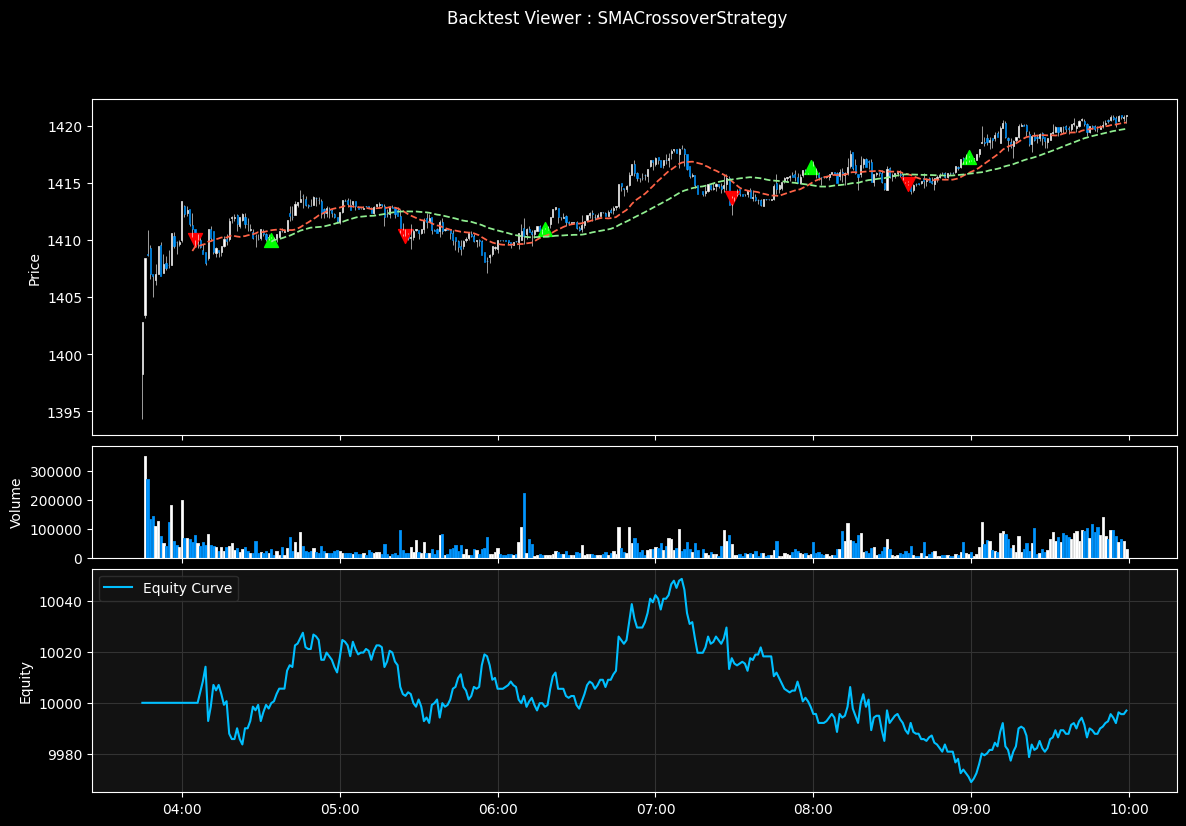

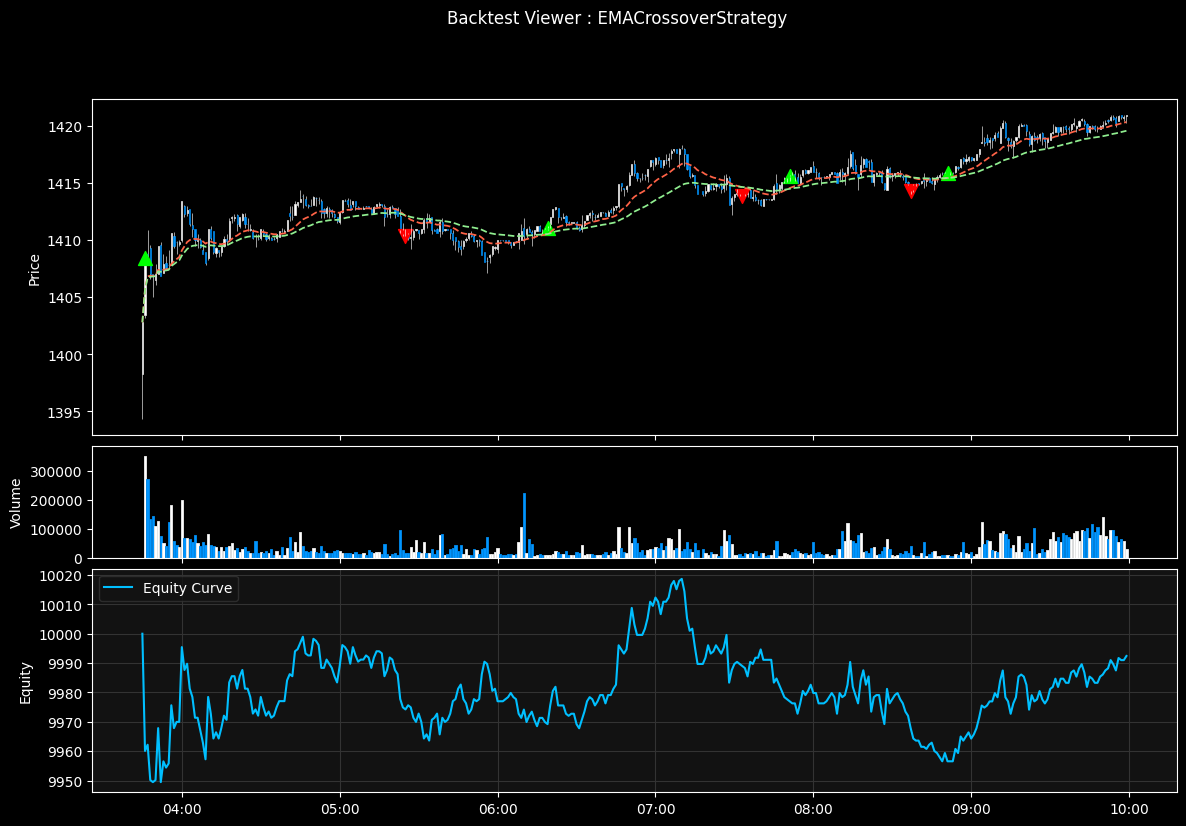

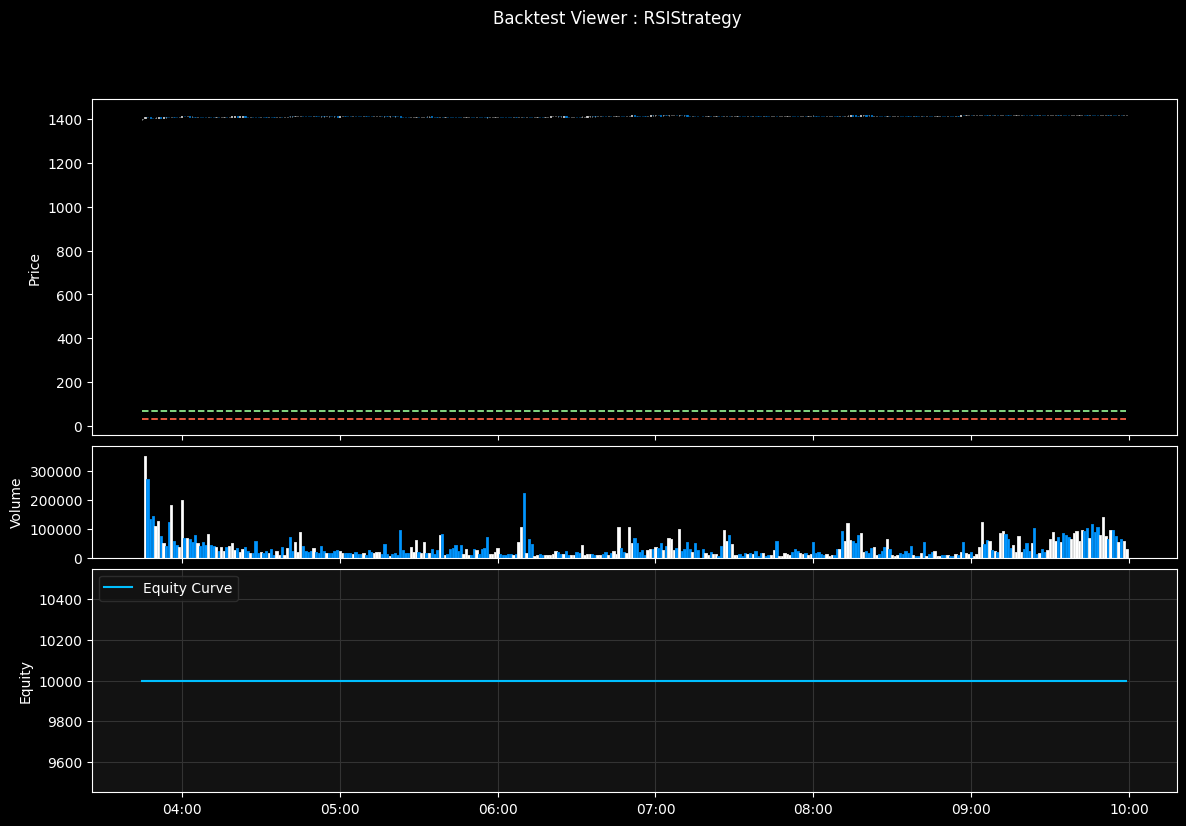

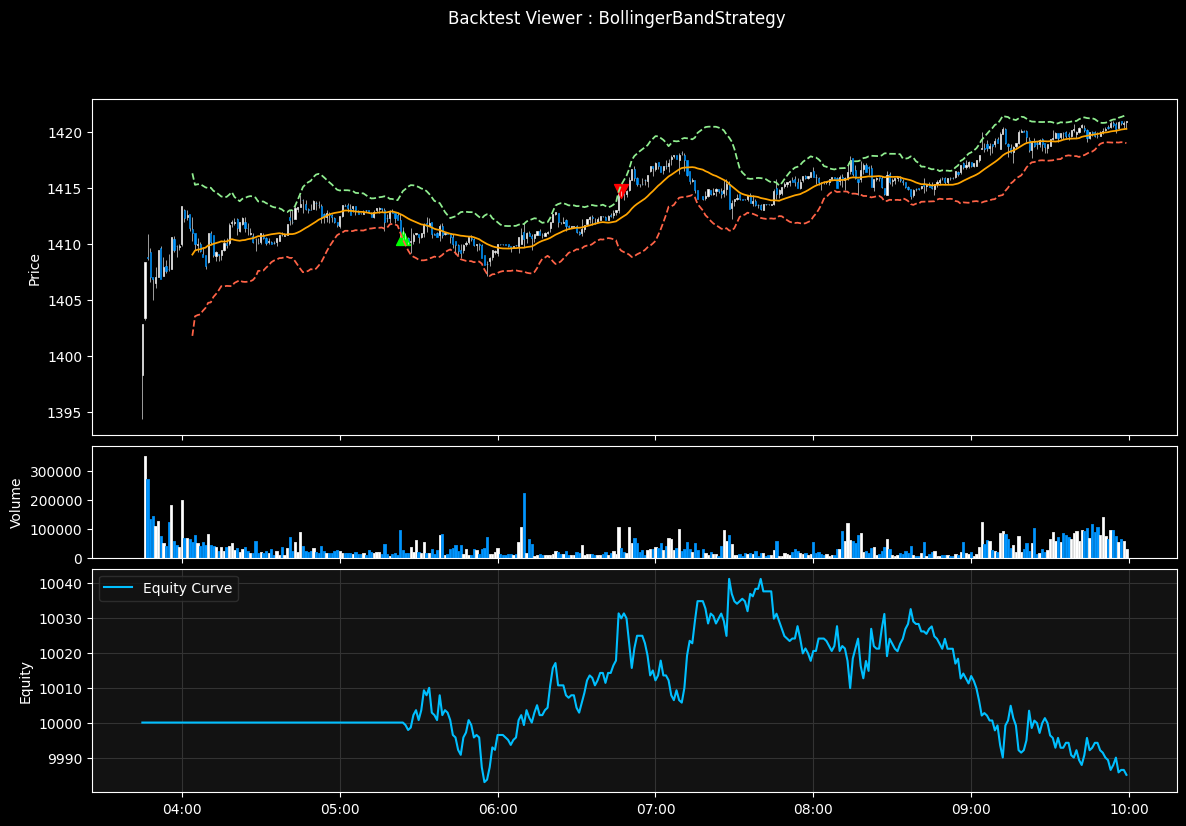

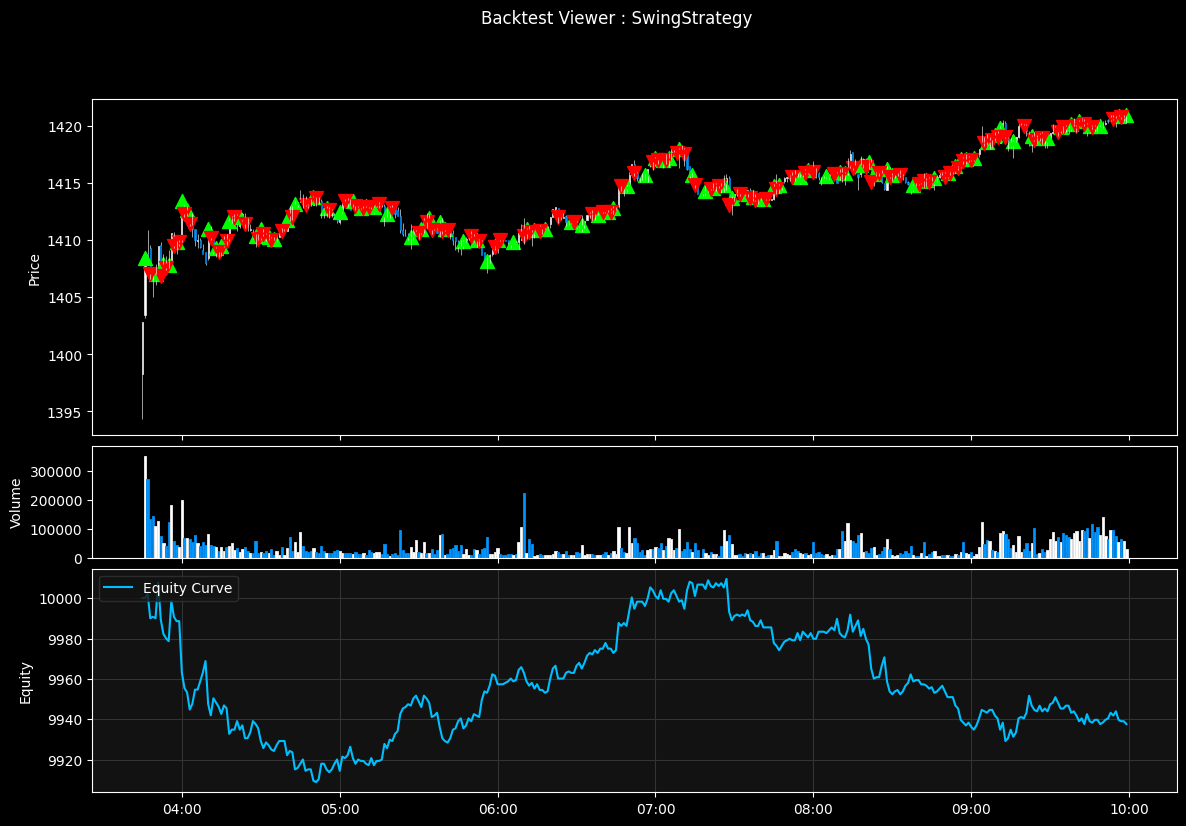

In [2]:
df = load_file("RELIANCE.NS 2025-08-20 16:33:52")

results_list = []

for strat_name, StratClass in STRATEGY_REGISTRY.items():
    try:
        strat = StratClass(df)
        signals = strat.generate_signals()

        bt = Backtester(df, signals)
        results = bt.run()
        metrics = calculate_metrics(results)

        # Collect for summary
        results_list.append({
            "strategy": strat_name,
            "metrics": metrics
        })

        # Visuals & experiment saving
        plot_results(df, signals, results, strat_name)
        save_experiment(metrics, tag=strat_name)

    except Exception as e:
        print(f"Strategy {strat_name} failed with error: {e}")